# IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import joblib

# READ DATASET

In [2]:
df = pd.read_csv('combined.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# checking the distribution of Target Variable
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# DATASET DESCRIPTION 
<ul>
  <li>Age: age of the patient [years]</li>
  <li>Sex: sex of the patient [M: Male, F: Female]</li>
  <li>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
  <li>RestingBP: resting blood pressure [mm Hg]</li>
  <li>Cholesterol: serum cholesterol [mm/dl]</li>
  <li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
  <li>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
  <li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
  <li>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</li>
  <li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
  <li>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
  <li>HeartDisease: output class [1: heart disease, 0: Normal]</li>
</ul>

Numerical = Age, RestingBP, Cholesterol, MaxHR, OldPeak,HeartDisease <br>
Categorical = Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope, , FastingBS

# Target 
0 --> Healthy Heart

1 --> Defective Heart

In [4]:
# Check for null values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### There are no null values 

In [5]:
## check duplicate values
df = df.drop_duplicates()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### There are no duplicates

# DATA PREPROCESSING

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [7]:
# statistical measures about the data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\1497838555.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

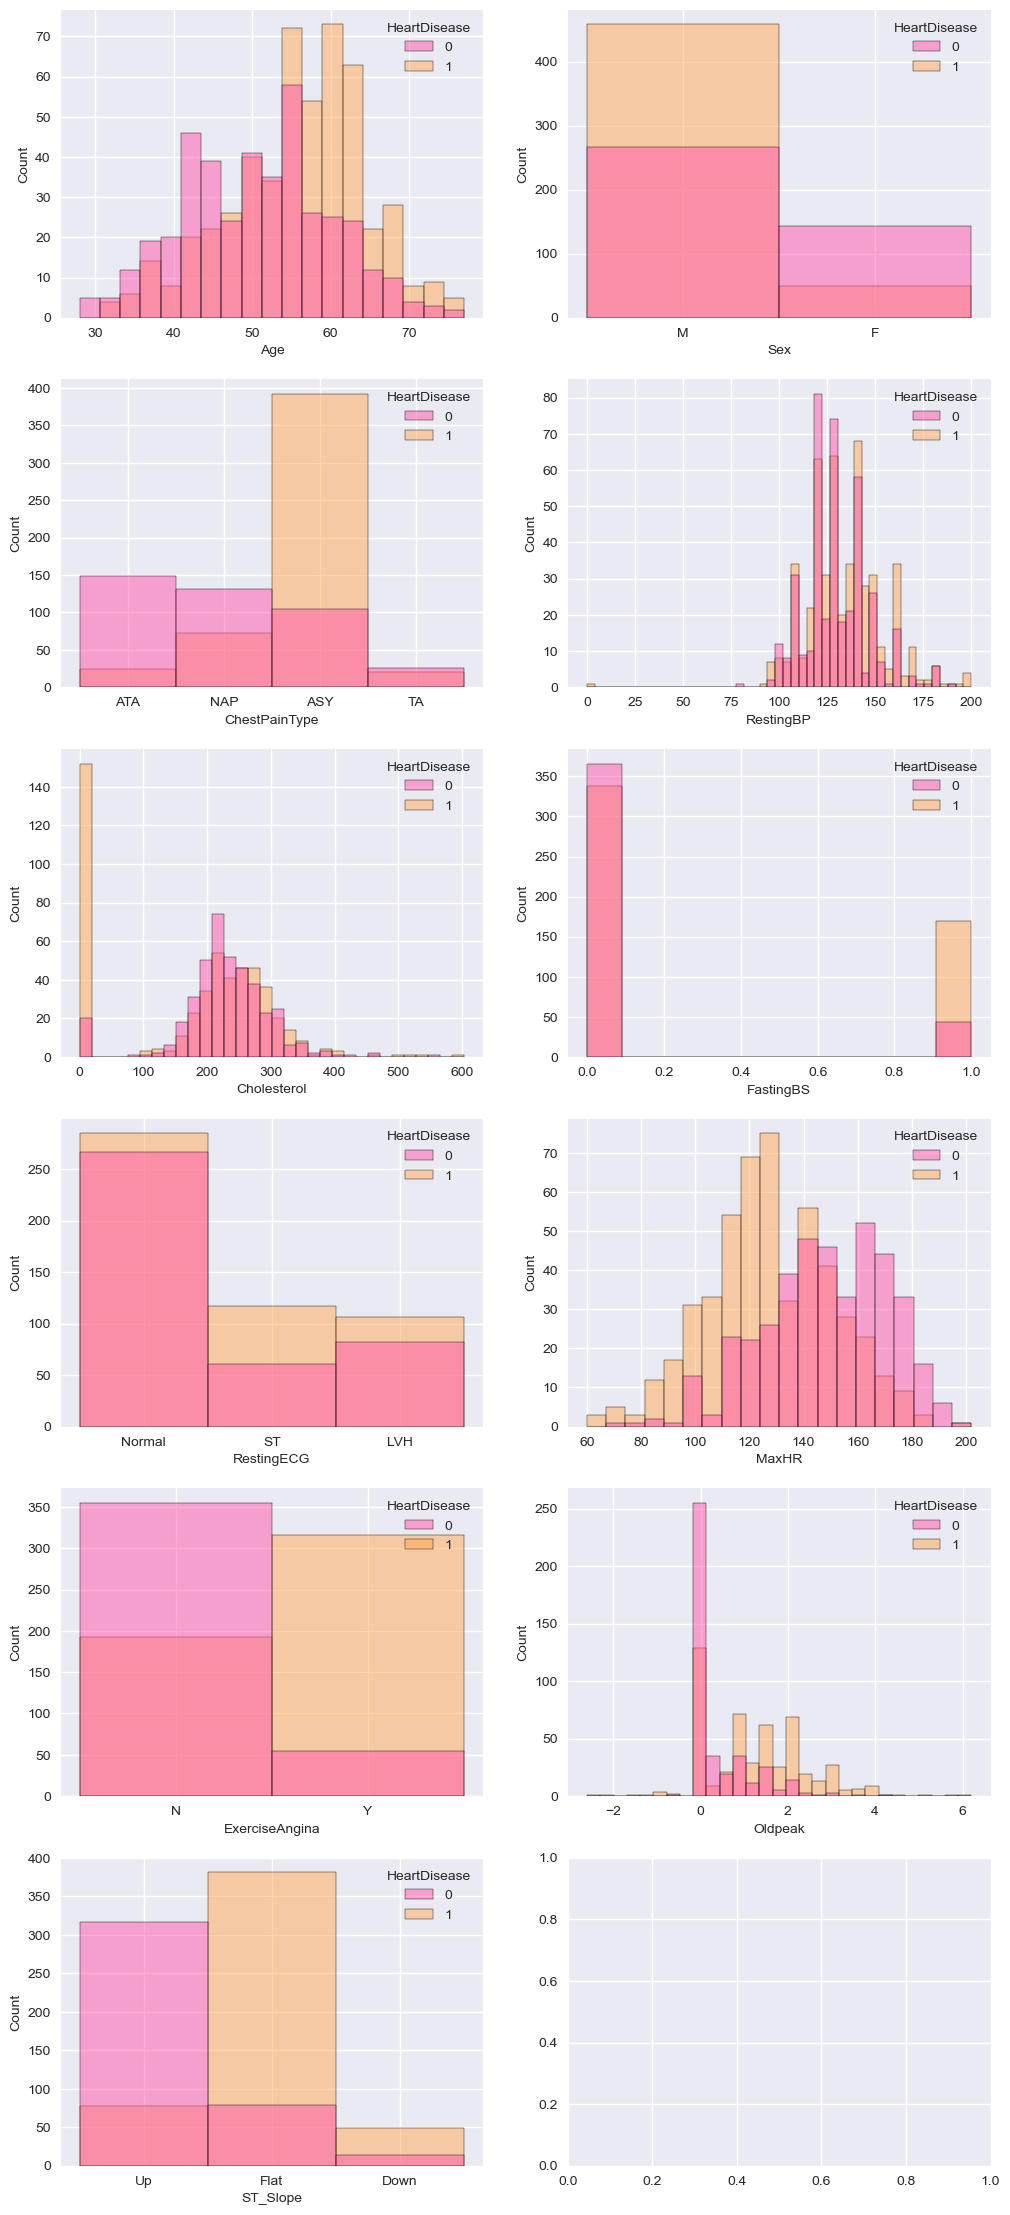

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.3)
color = 'spring'

fig, axs = plt.subplots(6, 2, figsize=(12,28))
i=1
for feature in df.columns:
    if feature not in ["HeartDisease"]:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, palette=color, hue='HeartDisease')
        i+=1

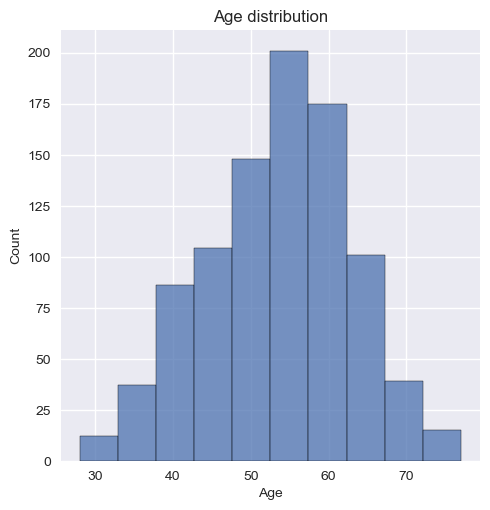

In [9]:
sns.displot(df['Age'], bins=10)
plt.title('Age distribution')
plt.show()

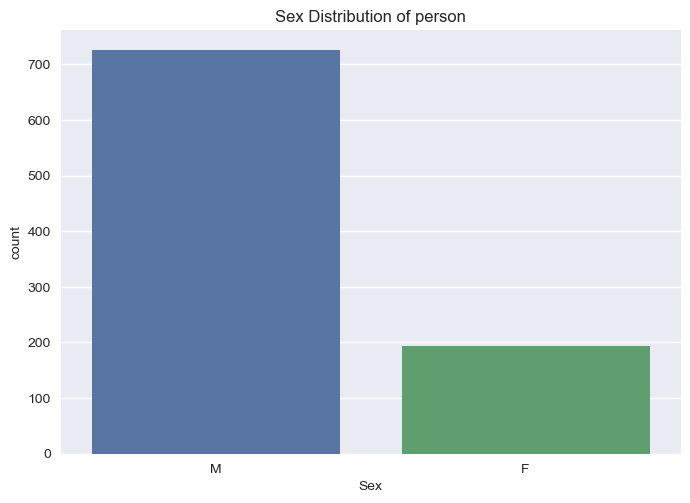

In [10]:
## Analysis of Sex columns
sns.countplot(x = 'Sex', data=df)
plt.title('Sex Distribution of person')
plt.show()

In [11]:
df['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [12]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

Males = 0 <br> Females = 1

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
## Now, divide the Age column in range of 10, for better visualization and classification
def make_age_range(age):
    if age<30:
        return '<30'
    elif age>=30 and age<40:
        return '30-40'
    elif age>=40 and age<50:
        return '40-50'
    elif age>=50 and age<60:
        return '50-60'
    elif age>=60 and age<70:
        return '60-70'
    else:
        return '>=70'
df['Age'] = df['Age'].apply(make_age_range)

In [15]:
## Now map the Age column range to int value
df['Age'] = df['Age'].map({'<30': 0,
                               '30-40': 1,
                               '40-50': 2,
                               '50-60': 3,
                               '60-70': 4,
                               '>=70': 5})


#### AGE MAPPING
<ul>
    <li> <30   = 0 </li>
    <li> 30-40 = 1 </li>
    <li> 40-50 = 2 </li>
    <li> 50-60 = 3 </li>
    <li> 60-70 = 4 </li>
    <li>  >70  = 5 </li>
    

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,2,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,2,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Analysis of ChestPainType column


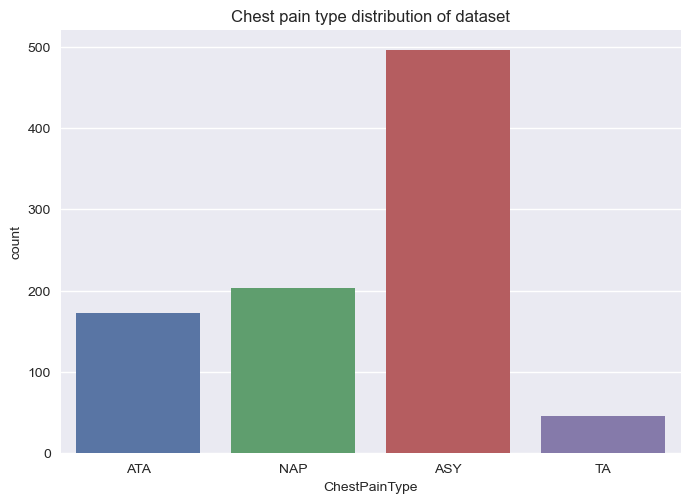

In [17]:
sns.countplot(x = 'ChestPainType', data=df)
plt.title('Chest pain type distribution of dataset')
plt.show()

Shows that most people are Asymptotic 

In [18]:
df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0,'NAP': 1,'ASY': 2, 'TA': 3})


#### Chest Pain Type Mapping
ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
<ul>
    <li> ATP = 0 </li>
    <li> NAP = 1 </li>
    <li> ASY = 2 </li>
    <li> TA  = 3 </li>


In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,Normal,172,N,0.0,Up,0
1,2,1,1,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,0,130,283,0,ST,98,N,0.0,Up,0
3,2,1,2,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,0,1,150,195,0,Normal,122,N,0.0,Up,0


#### Analysis on RestingBP Column

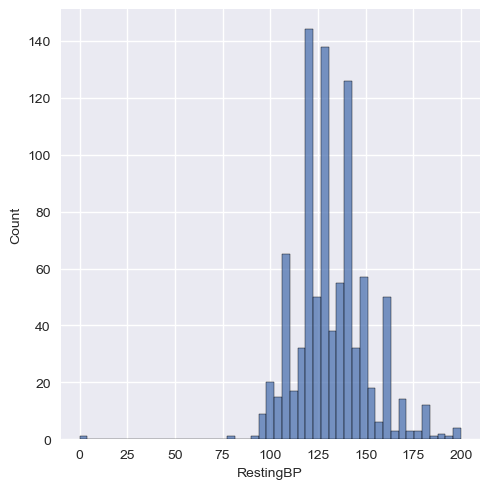

In [20]:
sns.displot(x = 'RestingBP', data=df)
plt.show()

In [21]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

Many Values lie between 120-130

<Axes: xlabel='RestingBP'>

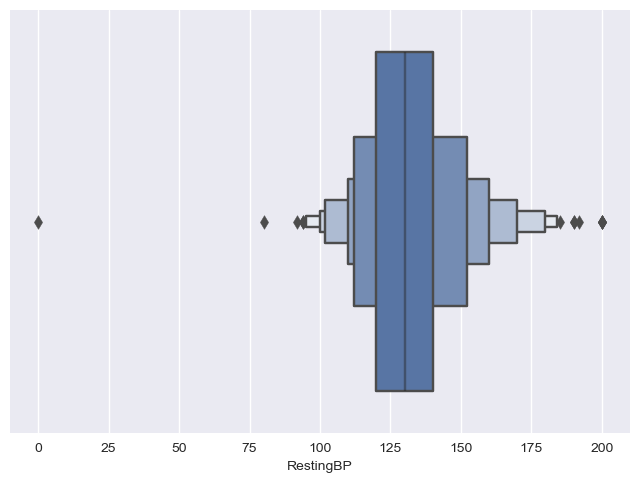

In [22]:
sns.boxenplot(x = 'RestingBP', data=df)

This shows that 0 is an outlier and can be removed

In [23]:
df = df[df['RestingBP']>0]

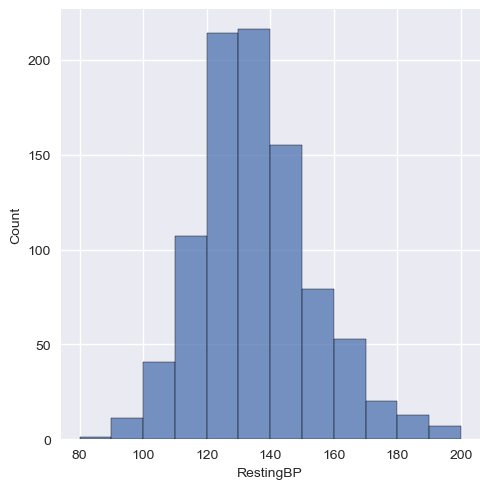

In [24]:
## Now
sns.displot(x = 'RestingBP', data=df, bins=12)
plt.show()

In [25]:
df['RestingBP'].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,Normal,172,N,0.0,Up,0
1,2,1,1,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,0,130,283,0,ST,98,N,0.0,Up,0
3,2,1,2,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,0,1,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
# df.loc[:, 'RestingBP'] = pd.to_numeric(df['RestingBP'], errors='coerce')

# def make_bp_range(bp):
#     if bp >= 80 and bp < 90:
#         return 0
#     elif bp >= 90 and bp < 100:
#         return 1
#     elif bp >= 100 and bp < 110:
#         return 2
#     elif bp >= 110 and bp < 120:
#         return 3
#     elif bp >= 120 and bp < 130:
#         return 4
#     elif bp >= 130 and bp < 140:
#         return 5
#     elif bp >= 140 and bp < 150:
#         return 6
#     elif bp >= 150 and bp < 160:
#         return 7
#     elif bp >= 160 and bp < 170:
#         return 8
#     elif bp >= 170 and bp < 180:
#         return 9
#     elif bp >= 180 and bp < 190:
#         return 10
#     else:
#         return 11

# df['RestingBP'] = df['RestingBP'].apply(make_bp_range)


In [28]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,2,0,3,110,264,0,Normal,132,N,1.2,Flat,1
914,4,0,2,144,193,1,Normal,141,N,3.4,Flat,1
915,3,0,2,130,131,0,Normal,115,Y,1.2,Flat,1
916,3,1,0,130,236,0,LVH,174,N,0.0,Flat,1
917,1,0,1,138,175,0,Normal,173,N,0.0,Up,0


#### Analysis for Cholesterol column

In [29]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [30]:
df['Cholesterol'].value_counts()

0      171
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

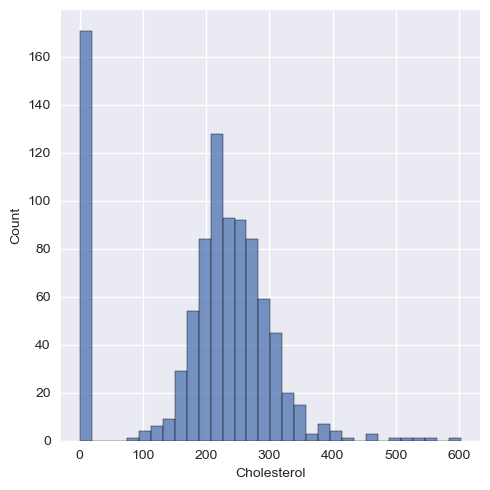

In [31]:
sns.displot(x = 'Cholesterol', data=df)
plt.show()

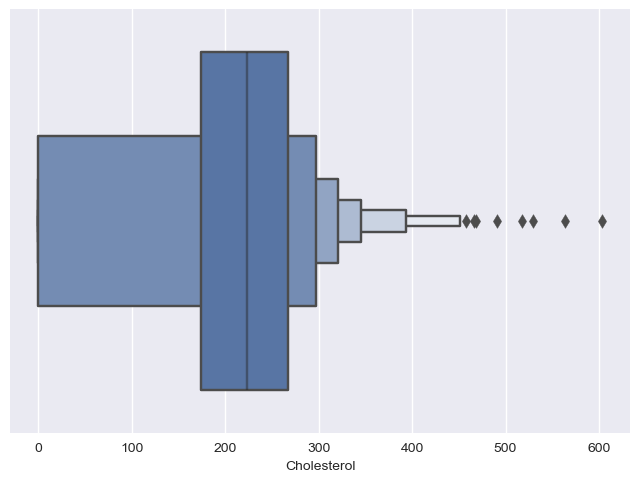

In [32]:
sns.boxenplot(x = 'Cholesterol', data=df)
plt.show()

In [33]:
# ## Now, make bucket of Cholesterol column
# def make_cholesterol_range(ch):
#     if ch>=0 and ch<100:
#         return '0-100'
#     elif ch>=100 and ch<200:
#         return '100-200'
#     elif ch>=200 and ch<300:
#         return '200-300'
#     elif ch>=300 and ch<400:
#         return '300-400'
#     elif ch>=400 and ch<500:
#         return '400-500'
#     elif ch>=500 and ch<600:
#         return '500-600'
#     else:
#         return '>=600'
# df['Cholesterol'] = df['Cholesterol'].apply(make_cholesterol_range)
# df['Cholesterol'] = df['Cholesterol'].map({
#     '0-100':0,
#     '100-200':1,
#     '200-300':2,
#     '300-400':3,
#     '400-500':4,
#     '500-600':5,
#     '>=600':6
# })

In [34]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,Normal,172,N,0.0,Up,0
1,2,1,1,160,180,0,Normal,156,N,1.0,Flat,1
2,1,0,0,130,283,0,ST,98,N,0.0,Up,0
3,2,1,2,138,214,0,Normal,108,Y,1.5,Flat,1
4,3,0,1,150,195,0,Normal,122,N,0.0,Up,0


#### Analysis of FastingBS column

In [35]:
df['FastingBS'].describe()

count    917.000000
mean       0.233370
std        0.423206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

In [36]:
df['FastingBS'].value_counts(normalize=True)

0    0.76663
1    0.23337
Name: FastingBS, dtype: float64

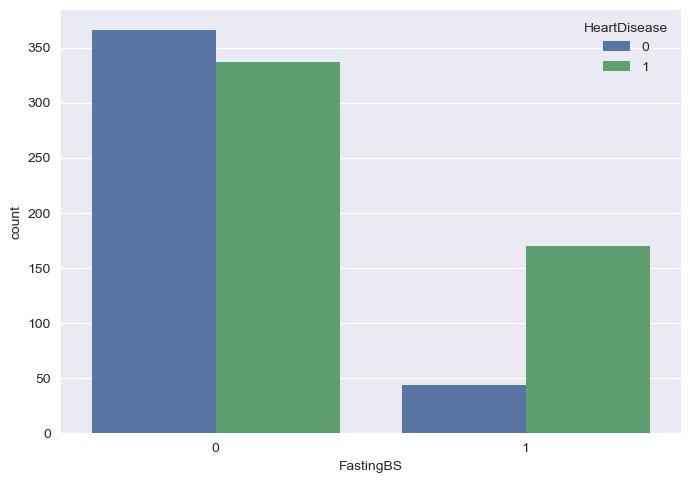

In [37]:
sns.countplot(x = 'FastingBS', hue='HeartDisease',data=df)
plt.show()

#### Analysis on RestingECG column

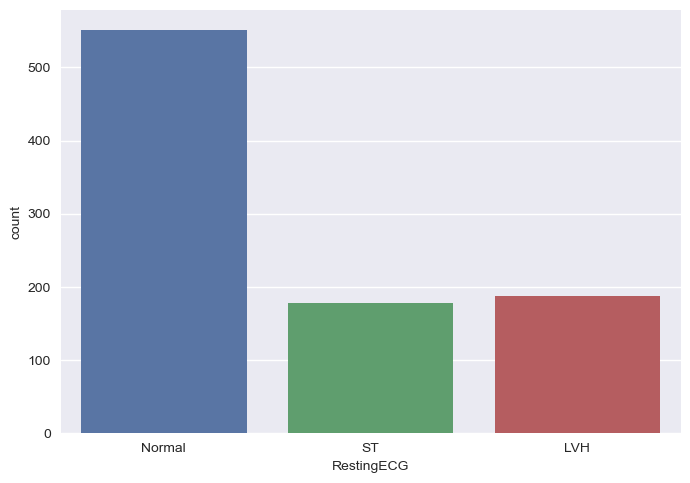

In [38]:
sns.countplot(x = 'RestingECG', data=df)
plt.show()

In [39]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [40]:
# df = pd.get_dummies(df, columns=['RestingECG'], prefix='RestingECG')


In [41]:
df['RestingECG'] = df['RestingECG'].map({'Normal': 0,'ST':1,'LVH': 2})

C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\4185916687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RestingECG'] = df['RestingECG'].map({'Normal': 0,'ST':1,'LVH': 2})


In [42]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,172,N,0.0,Up,0
1,2,1,1,160,180,0,0,156,N,1.0,Flat,1
2,1,0,0,130,283,0,1,98,N,0.0,Up,0
3,2,1,2,138,214,0,0,108,Y,1.5,Flat,1
4,3,0,1,150,195,0,0,122,N,0.0,Up,0


#### Analysis on MaxHR column

In [43]:
df['MaxHR'].describe()

count    917.000000
mean     136.789531
std       25.467129
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

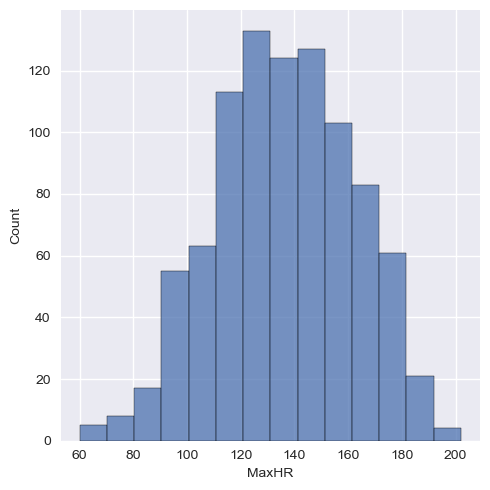

In [44]:
sns.displot(x = 'MaxHR', data=df, bins=14)
plt.show()

The most values lie between 120 and 160

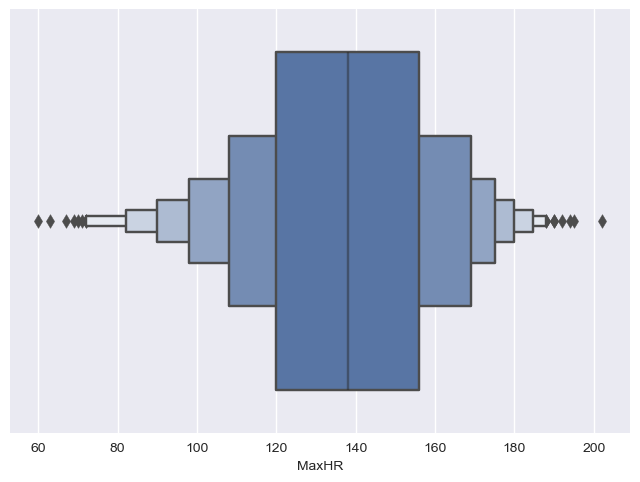

In [45]:
sns.boxenplot(x = 'MaxHR', data=df)
plt.show()

In [46]:
## Now, make range of MaxHR column
def make_maxhr_range(hr):
    if hr>=60 and hr<80:
        return '60-80'
    elif hr>=80 and hr<100:
        return '80-100'
    elif hr>=100 and hr<120:
        return '100-120'
    elif hr>=120 and hr<140:
        return '120-140'
    elif hr>=140 and hr<160:
        return '140-160'
    elif hr>=160 and hr<180:
        return '160-180'
    elif hr>=180 and hr<200:
        return '180-200'
    else:
        return '>=200'
df['MaxHR'] = df['MaxHR'].apply(make_maxhr_range)
df['MaxHR'] = df['MaxHR'].map({
    '60-80':0,
    '80-100':1,
    '100-120':2,
    '120-140':3,
    '140-160':4,
    '160-180':5,
    '180-200':6,
    '>=200':7
})

C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\3746258331.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MaxHR'] = df['MaxHR'].apply(make_maxhr_range)
C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\3746258331.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MaxHR'] = df['MaxHR'].map({


In [47]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,5,N,0.0,Up,0
1,2,1,1,160,180,0,0,4,N,1.0,Flat,1
2,1,0,0,130,283,0,1,1,N,0.0,Up,0
3,2,1,2,138,214,0,0,2,Y,1.5,Flat,1
4,3,0,1,150,195,0,0,3,N,0.0,Up,0


#### Analysis on ExerciserAngine column

In [48]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

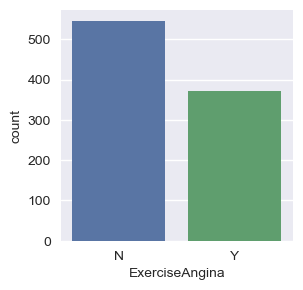

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'ExerciseAngina', data=df)
plt.show()

In [50]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({
    'N':0,
    'Y':1
})

C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\4076487302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExerciseAngina'] = df['ExerciseAngina'].map({


In [51]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,5,0,0.0,Up,0
1,2,1,1,160,180,0,0,4,0,1.0,Flat,1
2,1,0,0,130,283,0,1,1,0,0.0,Up,0
3,2,1,2,138,214,0,0,2,1,1.5,Flat,1
4,3,0,1,150,195,0,0,3,0,0.0,Up,0


#### Analysis on Old Peak

In [52]:
df['Oldpeak'].describe()

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

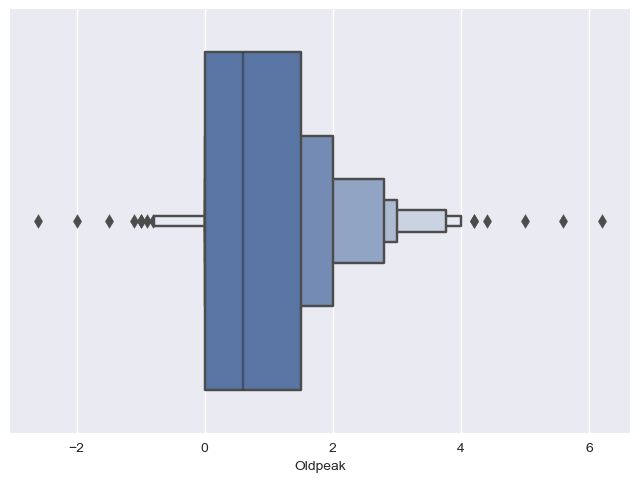

In [53]:
sns.boxenplot(x = 'Oldpeak', data=df)
plt.show()

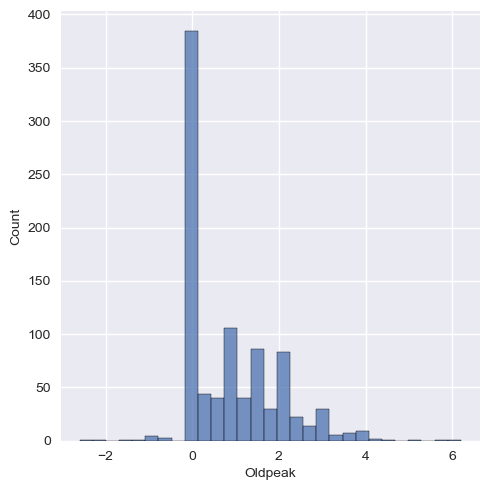

In [54]:
sns.displot(x = 'Oldpeak', data=df)
plt.show()

In [55]:
## Now, make range Oldpeak column
def make_oldpeak_range(old):
    if old<-2:
        return 0
    elif old>=-2 and old<0:
        return 1
    elif old>=0 and old<2:
        return 2
    elif old>=2 and old<4:
        return 3
    elif old>=4 and old<6:
        return 4
    else:
        return 5
df['Oldpeak'] = df['Oldpeak'].apply(make_oldpeak_range)

C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\1623044837.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Oldpeak'] = df['Oldpeak'].apply(make_oldpeak_range)


#### Analysis for ST_Slope column

In [56]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [57]:
## Now, map values to linear values
df['ST_Slope'] = df['ST_Slope'].map({
    'Up':0,
    'Flat':1,
    'Down':2
})

C:\Users\Tamilore\AppData\Local\Temp\ipykernel_35980\3808992228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ST_Slope'] = df['ST_Slope'].map({


In [58]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,5,0,2,0,0
1,2,1,1,160,180,0,0,4,0,2,1,1
2,1,0,0,130,283,0,1,1,0,2,0,0
3,2,1,2,138,214,0,0,2,1,2,1,1
4,3,0,1,150,195,0,0,3,0,2,0,0


#### Analysis on Heart Disease

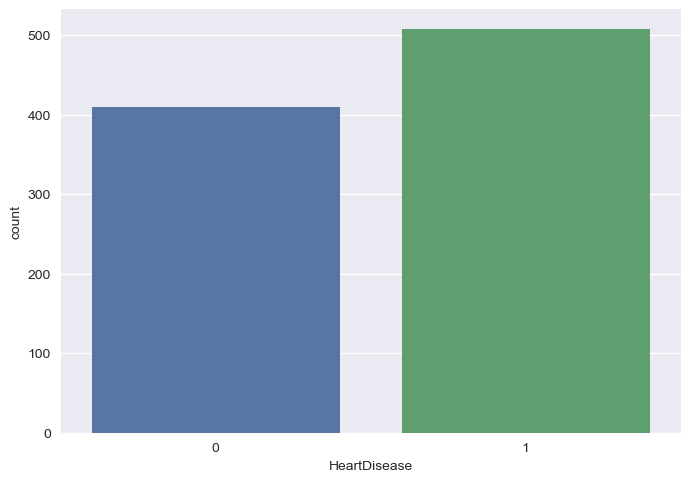

In [59]:
sns.countplot(x = 'HeartDisease', data=df)
plt.show()

In [60]:
df['HeartDisease'].value_counts(normalize=True)

1    0.55289
0    0.44711
Name: HeartDisease, dtype: float64

The dataset is nearly balance

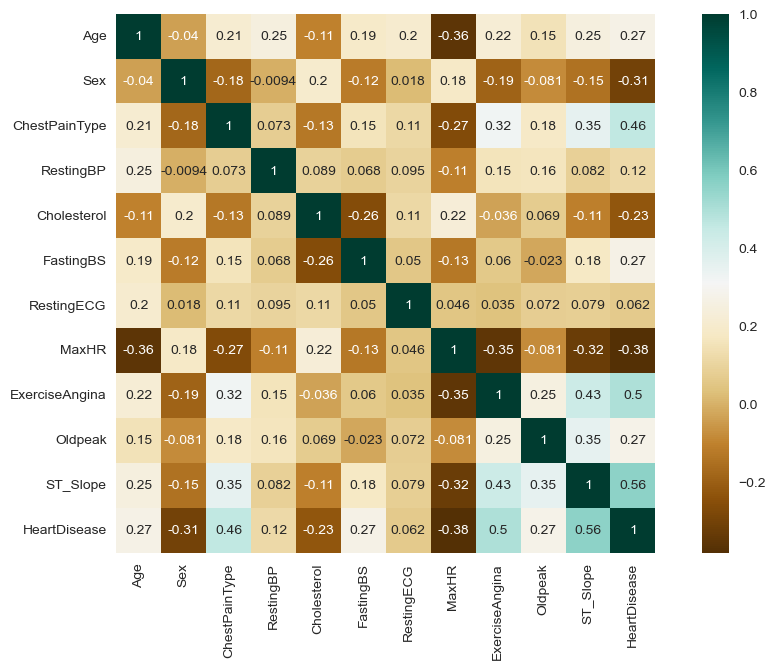

In [61]:
## Find correlation
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,cmap='BrBG', square=True)
plt.show()

In [62]:
# Separate the features (X) and the target variable (y)
X = df.drop('HeartDisease', axis=1)  # Replace 'target_variable_column_name' with the actual column name of your target variable
y = df['HeartDisease']  # Replace 'target_variable_column_name' with the actual column name of your target variable
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X.shape: (917, 11) y.shape: (917,)


In [63]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,5,0,2,0,0
1,2,1,1,160,180,0,0,4,0,2,1,1
2,1,0,0,130,283,0,1,1,0,2,0,0
3,2,1,2,138,214,0,0,2,1,2,1,1
4,3,0,1,150,195,0,0,3,0,2,0,0


In [64]:
# # Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,2,0,0,140,289,0,0,5,0,2,0,0
1,2,1,1,160,180,0,0,4,0,2,1,1
2,1,0,0,130,283,0,1,1,0,2,0,0
3,2,1,2,138,214,0,0,2,1,2,1,1
4,3,0,1,150,195,0,0,3,0,2,0,0


# BUILD MODEL & PARAMETER TUNING

## Train Random Forest Classifier 

In [66]:
# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
cv = StratifiedKFold(n_splits=5)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model and best parameters
rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

# Evaluate the model with cross-validation
rf_scores = cross_val_score(rf_best_model, X_train, y_train, cv=cv)

print("Best Parameters:", rf_best_params)
print("Cross-Validation Scores:", rf_scores)
print("Average CV Score:", rf_scores.mean())

rf_y_pred = rf_best_model.predict(X_test)
# Calculate specificity and sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, rf_y_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Scores: [0.89130435 0.86956522 0.86861314 0.83211679 0.82481752]
Average CV Score: 0.8572834020945731
Specificity: 0.8444444444444444
Sensitivity: 0.9071428571428571


## Train Logistic Regression Classifier 

In [67]:
# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter grid for grid search
lr_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
cv = StratifiedKFold(n_splits=5)
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=cv)
lr_grid_search.fit(X_train, y_train)

# Retrieve the best model and best parameters
lr_best_model = lr_grid_search.best_estimator_
lr_best_params = lr_grid_search.best_params_

# Calculate cross-validation score
lr_cv_scores = cross_val_score(lr_best_model, X_train, y_train, cv=cv)


print("Best Parameters:", lr_best_params)
print("Cross-Validation Scores:", lr_cv_scores)
print("Average CV Score:", lr_cv_scores.mean())


Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Cross-Validation Scores: [0.89130435 0.85507246 0.86861314 0.83211679 0.83211679]
Average CV Score: 0.8558447053845339


## Train XGBOOST Model

In [68]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for grid search
xgb_param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Perform grid search
cv = StratifiedKFold(n_splits=5)
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=cv)
xgb_grid_search.fit(X_train, y_train)

# Retrieve the best model and best parameters
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_params = xgb_grid_search.best_params_

# Evaluate the model with cross-validation
xgb_scores = cross_val_score(xgb_best_model, X_train, y_train, cv=cv)

print("Best Parameters:", xgb_best_params)
print("Cross-Validation Scores:", xgb_scores)
print("Average CV Score:", xgb_scores.mean())


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Cross-Validation Scores: [0.89130435 0.86231884 0.8540146  0.8540146  0.83941606]
Average CV Score: 0.86021368877605


## Train SVM Classifier

In [69]:
from sklearn.svm import SVC
# Define the SVM classifier
svm = SVC()

# Define the parameter grid for grid search
svm_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search
cv = StratifiedKFold(n_splits=5)
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=cv)
svm_grid_search.fit(X_train, y_train)

# Retrieve the best model and best parameters
svm_best_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_

# Evaluate the model with cross-validation
svm_scores = cross_val_score(svm_best_model, X_train, y_train, cv=cv)

print("Best Parameters:", svm_best_params)
print("Cross-Validation Scores:", svm_scores)
print("Average CV Score:", svm_scores.mean())

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation Scores: [0.89130435 0.86231884 0.86861314 0.82481752 0.82481752]
Average CV Score: 0.8543742727176559


## Train Artificial Neural Network Classifier 

In [70]:
# Define the MLP classifier
mlp = MLPClassifier(max_iter=5000)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
# Perform grid search
cv = StratifiedKFold(n_splits=5)
mlp_grid_search = GridSearchCV(mlp, param_grid, cv=cv)
mlp_grid_search.fit(X_train, y_train)

# Retrieve the best model and best parameters
mlp_best_model = mlp_grid_search.best_estimator_
mlp_best_params = mlp_grid_search.best_params_

# Make predictions with the best model
mlp_y_pred = mlp_best_model.predict(X_test)

# Evaluate the best model
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)

mlp_cv_scores = cross_val_score(mlp_best_model, X_train, y_train, cv=cv)


print("Best Parameters:", mlp_best_params)
print("Cross-Validation Scores:", mlp_cv_scores)
print("Average CV Score:", mlp_cv_scores.mean())

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10,)}
Cross-Validation Scores: [0.88405797 0.87681159 0.84671533 0.81751825 0.84671533]
Average CV Score: 0.854363694065376


# MAKE PREDICTIONS ON TEST SET

In [71]:
rf_y_pred = rf_best_model.predict(X_test)
lr_y_pred = lr_best_model.predict(X_test)
svm_y_pred = svm_best_model.predict(X_test)
xgb_y_pred = xgb_best_model.predict(X_test)

# EVALUATE THE MODELS 

In [72]:
rf_acc = accuracy_score(y_test, rf_y_pred)
svm_acc = accuracy_score(y_test, svm_y_pred)
lr_acc = accuracy_score(y_test, lr_y_pred)
xgb_acc = accuracy_score(y_test, xgb_y_pred)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)


rf_report = classification_report(y_test, rf_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)
lr_report = classification_report(y_test, lr_y_pred)
mlp_report = classification_report(y_test, mlp_y_pred)

In [73]:
# Add confusion matrix, sensitivity and specificity
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_sensitivity = rf_cm[0,0]/(rf_cm[0,0]+rf_cm[0,1])
rf_specificity = rf_cm[1,1]/(rf_cm[1,0]+rf_cm[1,1])

lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_sensitivity = lr_cm[0,0]/(lr_cm[0,0]+lr_cm[0,1])
lr_specificity = lr_cm[1,1]/(lr_cm[1,0]+lr_cm[1,1])

mlp_cm = confusion_matrix(y_test, mlp_y_pred)
mlp_sensitivity = mlp_cm[0,0]/(mlp_cm[0,0]+mlp_cm[0,1])
mlp_specificity = mlp_cm[1,1]/(mlp_cm[1,0]+mlp_cm[1,1])

svm_cm = confusion_matrix(y_test, svm_y_pred)
svm_sensitivity = svm_cm[0, 0] / (svm_cm[0, 0] + svm_cm[0, 1])
svm_specificity = svm_cm[1, 1] / (svm_cm[1, 0] + svm_cm[1, 1])

xgb_cm = confusion_matrix(y_test, xgb_y_pred)
xgb_sensitivity = xgb_cm[0, 0] / (xgb_cm[0, 0] + xgb_cm[0, 1])
xgb_specificity = xgb_cm[1, 1] / (xgb_cm[1, 0] + xgb_cm[1, 1])


# PRINT THE RESULTS 

In [74]:
print("MLP Accuracy:", mlp_accuracy)
print("MLP Forest Sensitivity:", mlp_sensitivity)
print("MLP Forest Specificity:", mlp_specificity)
print("MLP Forest Classification Report:")
print(mlp_report)
print()

MLP Accuracy: 0.8826086956521739
MLP Forest Sensitivity: 0.8777777777777778
MLP Forest Specificity: 0.8857142857142857
MLP Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        90
           1       0.92      0.89      0.90       140

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230




In [75]:
print("Random Forest Accuracy:", rf_acc)
print("Random Forest Sensitivity:", rf_sensitivity)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest Classification Report:")
print(rf_report)
print()

Random Forest Accuracy: 0.8826086956521739
Random Forest Sensitivity: 0.8444444444444444
Random Forest Specificity: 0.9071428571428571
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        90
           1       0.90      0.91      0.90       140

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230




In [76]:
# Print SVM results
print("SVM Accuracy:", svm_acc)
print("SVM Sensitivity:", svm_sensitivity)
print("SVM Specificity:", svm_specificity)
print("SVM Classification Report:")
print(svm_report)
print()

SVM Accuracy: 0.8434782608695652
SVM Sensitivity: 0.8222222222222222
SVM Specificity: 0.8571428571428571
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        90
           1       0.88      0.86      0.87       140

    accuracy                           0.84       230
   macro avg       0.83      0.84      0.84       230
weighted avg       0.85      0.84      0.84       230




In [77]:
# Print XGBoost results
print("XGBoost Accuracy:", xgb_acc)
print("XGBoost Sensitivity:", xgb_sensitivity)
print("XGBoost Specificity:", xgb_specificity)
print("XGBoost Classification Report:")
print(xgb_report)
print()

XGBoost Accuracy: 0.8869565217391304
XGBoost Sensitivity: 0.8888888888888888
XGBoost Specificity: 0.8857142857142857
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        90
           1       0.93      0.89      0.91       140

    accuracy                           0.89       230
   macro avg       0.88      0.89      0.88       230
weighted avg       0.89      0.89      0.89       230




In [78]:
print("Logistic Regression Accuracy:", lr_acc)
print("Logistic Regression Sensitivity:", lr_sensitivity)
print("Logistic Regression Specificity:", lr_specificity)
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Accuracy: 0.8347826086956521
Logistic Regression Sensitivity: 0.8222222222222222
Logistic Regression Specificity: 0.8428571428571429
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        90
           1       0.88      0.84      0.86       140

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.84       230



In [82]:
# # Save the random forest model
# joblib.dump(rf_best_model, 'rf_model.joblib')

['rf_model.joblib']

In [83]:
# # Save the logistic regression model
# joblib.dump(mlp_best_model, 'mlp2_best_model.joblib')

['mlp2_best_model.joblib']

In [84]:
# # Save the logistic regression model
# joblib.dump(xgb_best_model, 'xgb_best_model.joblib')

['xgb_best_model.joblib']